In [2]:
#Import scipy
import scipy as sci
#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [23]:
#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2
#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri
#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

#Define masses
m1=1.1 #Alpha Centauri A
m2=0.3 #Alpha Centauri B
#Define initial position vectors
r1=[-0.5,0,0] #m
r2=[0.5,0,0] #m
#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")
#Find Centre of Mass
r_com=(m1*r1+m2*r2)/(m1+m2)
#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s
#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")
#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

#Mass of the Third Star
m3=0.3 #Third Star
#Position of the Third Star
r3=[0,1,0] #m
r3=sci.array(r3,dtype="float64")
#Velocity of the Third Star
v3=[0,-0.01,0]
v3=sci.array(v3,dtype="float64")

#Update COM formula
r_com=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)
#Update velocity of COM formula
v_com=(m1*v1+m2*v2+m3*v3)/(m1+m2+m3)

In [24]:
def ThreeBodyEquations(w,t,G,m1,m2,m3):
    r1=w[:3]
    r2=w[3:6]
    r3=w[6:9]
    v1=w[9:12]
    v2=w[12:15]
    v3=w[15:18]
    r12=sci.linalg.norm(r2-r1)
    r13=sci.linalg.norm(r3-r1)
    r23=sci.linalg.norm(r3-r2)
    
    dv1bydt=K1*m2*(r2-r1)/r12**3+K1*m3*(r3-r1)/r13**3
    dv2bydt=K1*m1*(r1-r2)/r12**3+K1*m3*(r3-r2)/r23**3
    dv3bydt=K1*m1*(r1-r3)/r13**3+K1*m2*(r2-r3)/r23**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    dr3bydt=K2*v3
    r12_derivs=sci.concatenate((dr1bydt,dr2bydt))
    r_derivs=sci.concatenate((r12_derivs,dr3bydt))
    v12_derivs=sci.concatenate((dv1bydt,dv2bydt))
    v_derivs=sci.concatenate((v12_derivs,dv3bydt))
    derivs=sci.concatenate((r_derivs,v_derivs))
    return derivs

In [25]:
#Package initial parameters
init_params=sci.array([r1,r2,r3,v1,v2,v3]) #Initial parameters
init_params=init_params.flatten() #Flatten to make 1D array
time_span=sci.linspace(0,20,500) #20 orbital periods and 500 points
#Run the ODE solver
import scipy.integrate
three_body_sol=sci.integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(G,m1,m2,m3))

In [26]:
r1_sol=three_body_sol[:,:3]
r2_sol=three_body_sol[:,3:6]
r3_sol=three_body_sol[:,6:9]

"ani = animation.FuncAnimation(fig, update, N, fargs=(data, line), interval=10000/N, blit=False)\n#ani.save('matplot003.gif', writer='imagemagick')\nplt.show()"

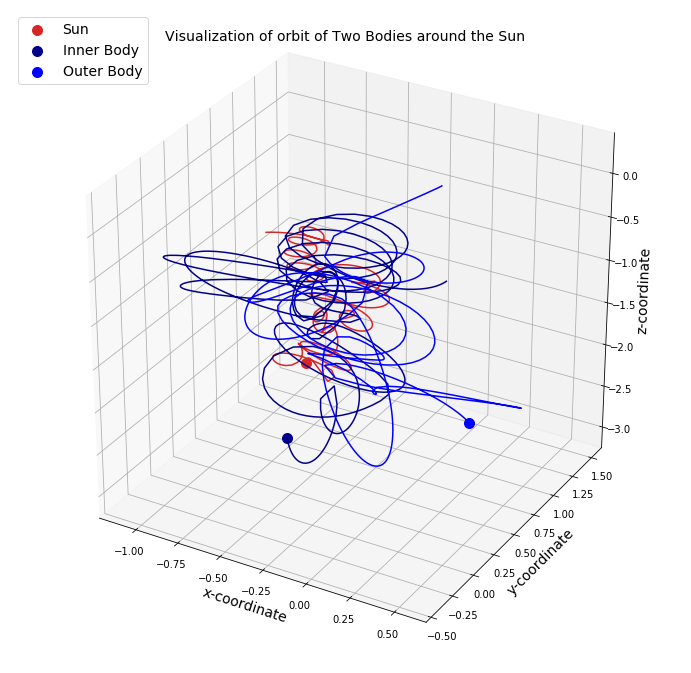

In [27]:
#%matplotlib notebook
#Create figure
fig=plt.figure(figsize=(12,12))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="tab:red")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="darkblue")
ax.plot(r3_sol[:,0],r3_sol[:,1],r3_sol[:,2],color="blue")
#Plot the final positions of the bodies
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="tab:red",marker="o",s=100,label="Sun")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="darkblue",marker="o",s=100,label="Inner Body")
ax.scatter(r3_sol[-1,0],r3_sol[-1,1],r3_sol[-1,2],color="blue",marker="o",s=100,label="Outer Body")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbit of Two Bodies around the Sun\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

'''ani = animation.FuncAnimation(fig, update, N, fargs=(data, line), interval=10000/N, blit=False)
#ani.save('matplot003.gif', writer='imagemagick')
plt.show()'''